K Means Clustering

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge#Here we set up the the standard scaler to the X_train data using fit()
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

number_of_cluters = 20

In [104]:
df = pd.read_csv('../data/2019_zip_data/prepped_zip_data_2019.csv', na_values=".")

In [105]:
df

,Unnamed: 0,Unnamed: 0_x,zip,total_population,log_total_population,population_density,total_workers,land_area,sqrt_land_area,aggregate_num_vehicles,...,average_commute_time_per_worker_other_means,households_with_0_vehicle,households_with_1_vehicle,households_with_2_vehicle,households_with_3_vehicle,households_with_4_vehicle,households_with_5_or_more_vehicle,Unnamed: 0_y,cbp_total_employees,cbp_total_establishments
0,0,0,601,17113,9.747594,1.026823e-04,3615,166659747,12909.676487,3115.0,...,NaN,141,1105,1527,473,281,88,NaN,NaN,NaN
1,1,1,602,37751,10.538767,4.760077e-04,11048,79307534,8905.477752,8645.0,...,NaN,527,2866,4167,1935,1126,427,NaN,NaN,NaN
2,2,2,603,47081,10.759625,5.749495e-04,11535,81887188,9049.153994,10460.0,...,NaN,462,3246,4731,2333,415,348,NaN,NaN,NaN
3,3,3,606,6392,8.762802,5.833182e-05,1238,109579993,10468.046284,1085.0,...,NaN,24,490,436,220,21,47,NaN,NaN,NaN
4,4,4,610,26686,10.191894,2.869048e-04,8201,93013428,9644.346945,6800.0,...,NaN,242,1855,3364,1848,811,81,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,33115,33115,99923,14,2.639057,3.320500e-07,14,42162326,6493.252344,NaN,...,NaN,0,0,14,0,0,0,35122.0,10.0,6.0
33116,33116,33116,99925,908,6.811244,6.302447e-06,372,144071036,12002.959468,235.0,...,10.882353,20,102,101,73,48,28,35123.0,229.0,27.0
33117,33117,33117,99926,1654,7.410952,4.808914e-06,536,343944587,18545.743096,350.0,...,NaN,49,117,246,97,14,13,35124.0,97.0,12.0
33118,33118,33118,99927,0,-inf,0.000000e+00,0,589690080,24283.535163,NaN,...,NaN,0,0,0,0,0,0,NaN,NaN,NaN


In [106]:
# Clean Data
# zip is not included beacuse that's an index, not a calculated value
df = df[['vehicles_per_worker',
         'total_population',
         'average_commute_time_per_worker_drive_alone',
         'pct_unemployed',
         'sqrt_land_area',
         'cbp_total_employees',
         'cbp_total_establishments',
         'pct_all_public_tspt_wrkr_cmute','pct_walked_wrkr_cmute']]

In [107]:
np.any(np.isnan(df))

True

In [108]:
np.all(np.isfinite(df))


False

In [109]:
df=df.dropna()
# df.pct_walking_and_public_transit = df.pct_all_public_tspt_wrkr_cmute + df.pct_walked_wrkr_cmute
# df.pct_walking_and_public_transit
# df
df['pct_walking_and_public_transit'] = df['pct_all_public_tspt_wrkr_cmute'] + df['pct_walked_wrkr_cmute']
df

,vehicles_per_worker,total_population,average_commute_time_per_worker_drive_alone,pct_unemployed,sqrt_land_area,cbp_total_employees,cbp_total_establishments,pct_all_public_tspt_wrkr_cmute,pct_walked_wrkr_cmute,pct_walking_and_public_transit
131,0.896627,17312,20.059524,3.930800,5458.652581,9559.0,473.0,0.009311,0.006892,0.016203
134,0.796604,5128,36.923722,2.889577,10706.931867,1060.0,91.0,0.000000,0.000000,0.000000
137,1.005155,261,22.886598,10.599078,1450.638135,131.0,16.0,0.000000,0.000000,0.000000
141,0.878192,22733,18.913516,5.796095,3819.444069,5342.0,313.0,0.015539,0.024587,0.040126
142,0.911773,30108,18.681361,5.727370,5695.586274,8998.0,545.0,0.009800,0.012930,0.022730
...,...,...,...,...,...,...,...,...,...,...
33082,0.280899,214,6.500000,9.259259,7929.561779,14.0,4.0,0.000000,0.287356,0.287356
33101,0.540541,808,6.489899,15.384615,4347.999080,104.0,26.0,0.070122,0.234756,0.304878
33105,0.692838,8640,8.957101,4.968179,64676.503840,3010.0,365.0,0.012138,0.162733,0.174871
33109,0.738580,13822,13.516856,5.905616,111465.996941,4559.0,606.0,0.039366,0.078154,0.117520


In [110]:
df

,vehicles_per_worker,total_population,average_commute_time_per_worker_drive_alone,pct_unemployed,sqrt_land_area,cbp_total_employees,cbp_total_establishments,pct_all_public_tspt_wrkr_cmute,pct_walked_wrkr_cmute,pct_walking_and_public_transit
131,0.896627,17312,20.059524,3.930800,5458.652581,9559.0,473.0,0.009311,0.006892,0.016203
134,0.796604,5128,36.923722,2.889577,10706.931867,1060.0,91.0,0.000000,0.000000,0.000000
137,1.005155,261,22.886598,10.599078,1450.638135,131.0,16.0,0.000000,0.000000,0.000000
141,0.878192,22733,18.913516,5.796095,3819.444069,5342.0,313.0,0.015539,0.024587,0.040126
142,0.911773,30108,18.681361,5.727370,5695.586274,8998.0,545.0,0.009800,0.012930,0.022730
...,...,...,...,...,...,...,...,...,...,...
33082,0.280899,214,6.500000,9.259259,7929.561779,14.0,4.0,0.000000,0.287356,0.287356
33101,0.540541,808,6.489899,15.384615,4347.999080,104.0,26.0,0.070122,0.234756,0.304878
33105,0.692838,8640,8.957101,4.968179,64676.503840,3010.0,365.0,0.012138,0.162733,0.174871
33109,0.738580,13822,13.516856,5.905616,111465.996941,4559.0,606.0,0.039366,0.078154,0.117520


In [111]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

df

,vehicles_per_worker,total_population,average_commute_time_per_worker_drive_alone,pct_unemployed,sqrt_land_area,cbp_total_employees,cbp_total_establishments,pct_all_public_tspt_wrkr_cmute,pct_walked_wrkr_cmute,pct_walking_and_public_transit
131,0.896627,17312,20.059524,3.930800,5458.652581,9559.0,473.0,0.009311,0.006892,0.016203
134,0.796604,5128,36.923722,2.889577,10706.931867,1060.0,91.0,0.000000,0.000000,0.000000
137,1.005155,261,22.886598,10.599078,1450.638135,131.0,16.0,0.000000,0.000000,0.000000
141,0.878192,22733,18.913516,5.796095,3819.444069,5342.0,313.0,0.015539,0.024587,0.040126
142,0.911773,30108,18.681361,5.727370,5695.586274,8998.0,545.0,0.009800,0.012930,0.022730
...,...,...,...,...,...,...,...,...,...,...
33082,0.280899,214,6.500000,9.259259,7929.561779,14.0,4.0,0.000000,0.287356,0.287356
33101,0.540541,808,6.489899,15.384615,4347.999080,104.0,26.0,0.070122,0.234756,0.304878
33105,0.692838,8640,8.957101,4.968179,64676.503840,3010.0,365.0,0.012138,0.162733,0.174871
33109,0.738580,13822,13.516856,5.905616,111465.996941,4559.0,606.0,0.039366,0.078154,0.117520


In [112]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=number_of_cluters, n_init=20) # default is 10

y_kmeans = kmeans.fit_predict(df)
df['cluster'] = kmeans.labels_

# df = df.groupby('quality').mean() #cluster means
df = df.groupby('cluster').mean() #cluster means
# df.groupby('cluster').groups
df = df.sort_values(by=['pct_walking_and_public_transit'], ascending=False)
df

C:\Users\cjong\AppData\Local\Temp\ipykernel_22892\3684634308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


,vehicles_per_worker,total_population,average_commute_time_per_worker_drive_alone,pct_unemployed,sqrt_land_area,cbp_total_employees,cbp_total_establishments,pct_all_public_tspt_wrkr_cmute,pct_walked_wrkr_cmute,pct_walking_and_public_transit
cluster,,,,,,,,,,
18,0.045463,39500.250000,38.884838,3.604877,1159.042587,149914.500000,5603.250000,0.451932,0.413607,0.865540
7,0.560737,88997.146341,32.791427,6.398768,6252.940187,18932.109756,1467.560976,0.289290,0.049183,0.338473
4,0.574785,33714.307692,27.271576,4.743736,4095.655526,72644.961538,2407.038462,0.156778,0.162590,0.319368
11,0.726346,28118.396947,25.192415,4.552459,5042.765452,43704.206107,1671.793893,0.097688,0.063680,0.161368
14,0.729551,63316.035433,30.032775,6.510513,7261.020485,12256.059055,995.047244,0.135488,0.024842,0.160331
3,0.756502,16170.314554,22.780540,5.439930,4209.823401,19937.300469,905.023474,0.073487,0.064378,0.137864
9,0.766507,57690.712418,25.776380,5.105438,9066.242476,32792.679739,1687.457516,0.085317,0.036249,0.121566
1,0.775652,46922.151832,28.138615,5.935626,7192.424028,10389.827225,824.714660,0.090152,0.022647,0.112799
10,0.777328,34675.061372,27.385644,5.941419,5621.814395,7978.265343,652.965704,0.087854,0.024150,0.112004


<AxesSubplot:ylabel='cluster'>

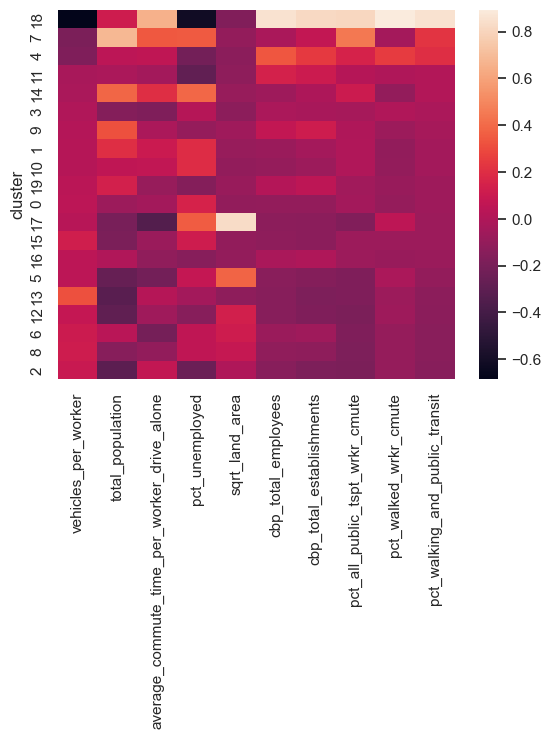

In [113]:
df_norm = (df - df.mean()) / (df.max() - df.min())
sns.heatmap(df_norm)

todo: conduct calculations in relative terms ie percentges